In [168]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib
import cv2
import os
import imghdr
import pandas as pd

from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import Sequential, load_model
from PIL import Image

from os import listdir
from os.path import join
from numpy import expand_dims

print(f"TensorFlow Version:{tf.__version__}")
print(f'Keras Version:{keras.__version__}')
print(f"Numpy Version:{np.__version__}")
print(f'PIL Image Version:{Image.__version__}')
print(f'Matplotlib Version:{matplotlib.__version__}')


TensorFlow Version:2.9.2
Keras Version:2.9.0
Numpy Version:1.23.4
PIL Image Version:9.3.0
Matplotlib Version:3.6.0


In [2]:
data_dir = "D:\\DogsAndCats\\example\\"


In [3]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']


In [4]:
img = cv2.imread(join(data_dir, 'cat', 'cat.0.jpg'))
img.shape


(374, 500, 3)

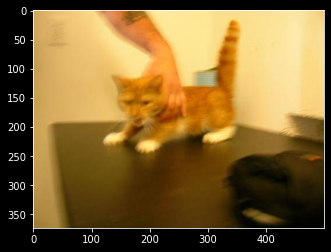

In [5]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


In [8]:
for image_class in listdir(data_dir):
    for image in listdir(join(data_dir, image_class)):
        image_path = join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except:
            print("Issue with image {}".format(image_path))


In [9]:
tf.data.Dataset??


Init signature: tf.data.Dataset(variant_tensor)
Source:        
class DatasetV2(collections_abc.Iterable, tracking_base.Trackable,
                composite_tensor.CompositeTensor):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dtype=int32)
  tf.Tensor(3, shape=(), dtype=int32)

  To process lines from files, use 

In [10]:
tf.keras.utils.image_dataset_from_directory??


Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export('keras.utils.image_dataset_from_directory',
              'keras.preprocessing.image_dataset_from_directory',
              v1=[])
def image_dataset_from_directory(directory,
                                 labels='inferred',
                                 label_mode='int',
                                 class_names=None,
                                 color_mode='rgb',
                                 batch_size=32,
                                 image_size=(256, 256),
                                 shuffle=True,
                                 seed=None,
               

In [11]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)


Found 48 files belonging to 2 classes.


In [13]:
data_iterator = data.as_numpy_iterator()


In [14]:
batch = data_iterator.next()


In [16]:
batch[0].shape


(32, 256, 256, 3)

In [17]:
# class 1 = DOG
# class 0 = CAT
batch[1]


array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1])

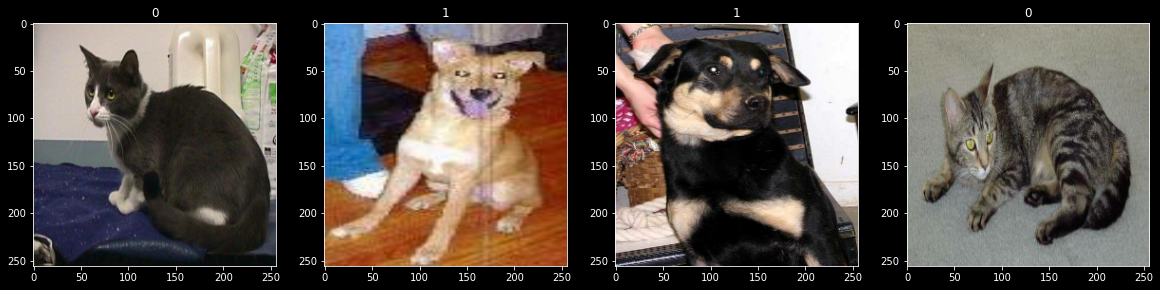

In [18]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img, in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


In [19]:
batch[0].min()


0.0

In [20]:
batch[0].max()


255.0

In [21]:
scaled = batch[0] / 255


In [22]:
scaled.max()


1.0

In [23]:
data = data.map(lambda x, y: (x/255, y))


In [24]:
scaled_iterator = data.as_numpy_iterator()


In [25]:
batch = scaled_iterator.next()


In [26]:
batch[0].max()


1.0

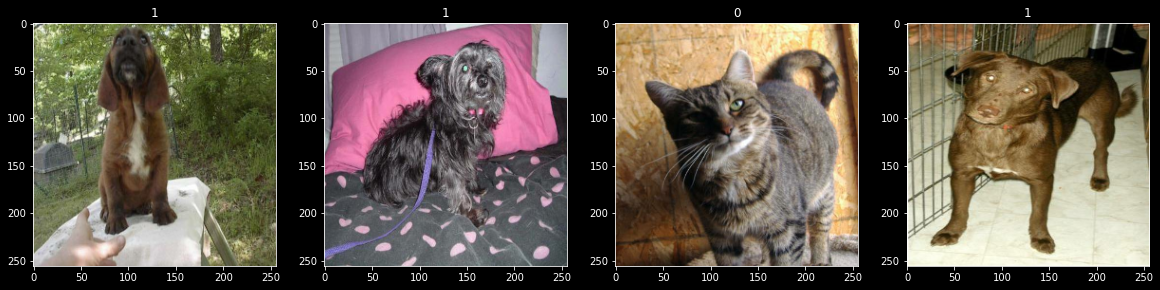

In [27]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img, in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])


In [28]:
len(data)


2

In [29]:
train_size = int(len(data) * .5)
val_size = int(len(data) * .2) + 1
test_size = int(len(data) * .1) + 1


In [30]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size).take(test_size)


In [33]:
model = Sequential()


In [34]:
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [35]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(),
              metrics=['accuracy'])


In [36]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [37]:
logs_dir = 'logs'


In [38]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logs_dir)


In [39]:
hist = model.fit(train, epochs=20, validation_data=val,
                 callbacks=[tensorboard_callback])


Epoch 1/20
1/1 [==============================] - 3s 3s/step - loss: 0.6987 - accuracy: 0.4375 - val_loss: 4.3339 - val_accuracy: 0.4375
Epoch 2/20
1/1 [==============================] - 2s 2s/step - loss: 3.5266 - accuracy: 0.5312 - val_loss: 0.9073 - val_accuracy: 0.3750
Epoch 3/20
1/1 [==============================] - 1s 1s/step - loss: 0.7362 - accuracy: 0.5625 - val_loss: 1.1842 - val_accuracy: 0.1250
Epoch 4/20
1/1 [==============================] - 1s 1s/step - loss: 0.8721 - accuracy: 0.4375 - val_loss: 0.7854 - val_accuracy: 0.4375
Epoch 5/20
1/1 [==============================] - 2s 2s/step - loss: 0.8248 - accuracy: 0.4062 - val_loss: 0.7062 - val_accuracy: 0.5000
Epoch 6/20
1/1 [==============================] - 2s 2s/step - loss: 0.7838 - accuracy: 0.3750 - val_loss: 0.6878 - val_accuracy: 0.5625
Epoch 7/20
1/1 [==============================] - 2s 2s/step - loss: 0.7135 - accuracy: 0.4375 - val_loss: 0.6842 - val_accuracy: 0.5000
Epoch 8/20
1/1 [=========================

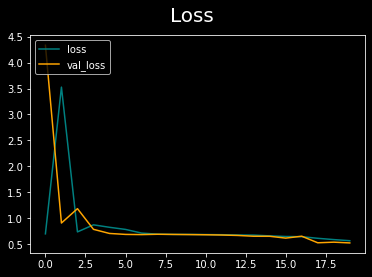

In [40]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()


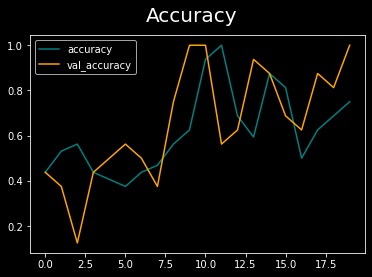

In [41]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()


In [42]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()


In [43]:
len(test)


1

In [44]:
for batch in test.as_numpy_iterator():
    x, y = batch
    yhat = model.predict(x)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)


1/1 [==============================] - 0s 253ms/step


In [45]:
print(
    f'Precission:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')


Precission:0.8571428656578064, Recall:1.0, Accuracy:0.9375


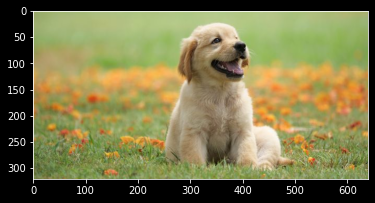

In [46]:
img = cv2.imread('dog-test.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


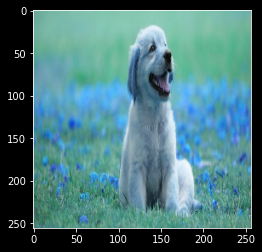

In [47]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()


In [48]:
resize.shape


TensorShape([256, 256, 3])

In [49]:
expand_dims(resize, 0).shape


(1, 256, 256, 3)

In [50]:
predict = model.predict(expand_dims(resize/255, 0))
val_predict = float(np.format_float_positional(predict[0][0], precision=3))
val_predict


1/1 [==============================] - 0s 32ms/step


In [52]:
if val_predict <= 0.52:
    print("is a cat class")
else:
    print("is a dog class")


is a dog class


In [162]:
df = pd.DataFrame()
list_cats = []
list_dogs = []
list_animals = []

for file in listdir(join('D:\\DogsAndCats', 'test')):
    path = join('D:\\DogsAndCats', 'test', file)
    img = cv2.imread(path)
    resize = tf.image.resize(img, (256, 256))
    dim = expand_dims(resize/255, 0)
    predict = model.predict(dim)
    list_animals.append(predict[0][0])


1/1 [==============================] - 0s 67ms/step


In [163]:
df['animals'] = list_animals
df['cat'] = df['animals'] <= 0.51
df['dog'] = df['animals'] > 0.51
df = df.astype({'cat': int, 'dog': int})


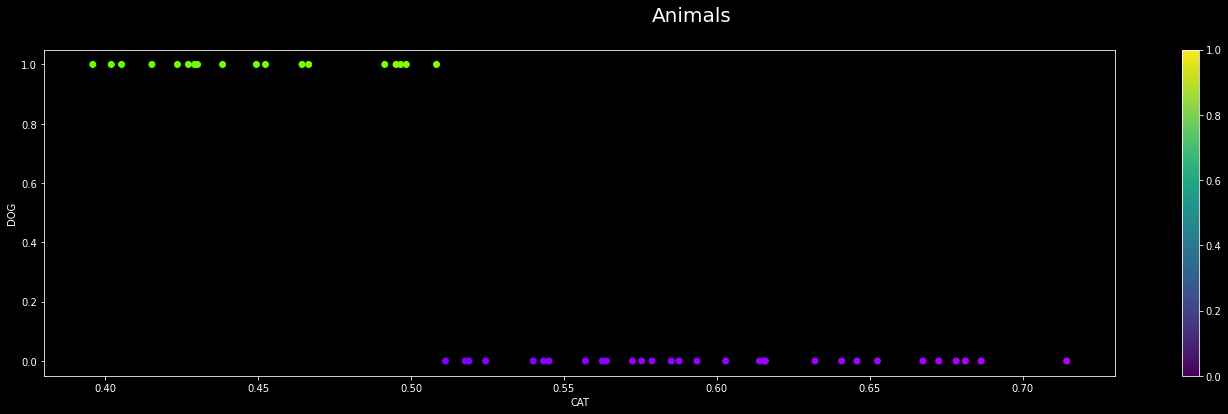

In [164]:
fig = plt.figure(figsize=(24, 6))

plt.scatter(df.values[:, 0], df.values[:, 1], c=df.values)
plt.colorbar()
fig.suptitle('Animals', fontsize=20)
plt.xlabel("CAT")
plt.ylabel("DOG")

plt.show()


In [166]:
fig = px.scatter(df, x="animals", y="cat", color="animals",
                 hover_data=['dog', 'cat', 'animals'])
fig.show()


# Save Model

In [169]:
model.save(join('D:\\DogsAndCats\\', 'models', 'image_classifier.h5'))
new_model = load_model(join('D:\\DogsAndCats', 'models', 'image_classifier.h5'))


In [170]:
new_predict = new_model.predict(expand_dims(resize/255, 0))
new_predict = float(np.format_float_positional(new_predict[0][0], precision=3))
new_predict

if new_predict <= 0.51:
    print("is a cat class")
else:
    print("is a dog class")


1/1 [==============================] - 0s 315ms/step
is a dog class
